In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 - Define Buisness Goal

* Build a model than predict **"survived"**, **"not survived"** for the passengers of titanic given its *Passenger Class, Sex, Age, Siblings/Spouse number, Parent/Children number, Fare, Location of Embarking* (Min Accuracy: 0.78)

## Step 2 - Get the data

In [2]:
data_train = pd.read_csv('data/train.csv')

## Step 3 - Train-Test-Split

In [370]:
from sklearn.model_selection import train_test_split

## Step 4 - Explore the Data

In [371]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [372]:
data_train.shape

(891, 12)

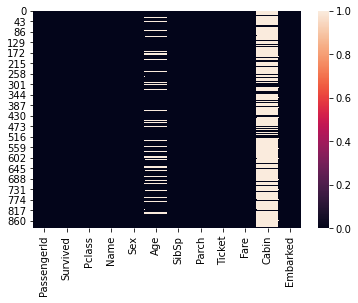

In [373]:
sns.heatmap(data_train.isna(), vmin=0, vmax=1)

In [374]:
# Check for NaN 
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

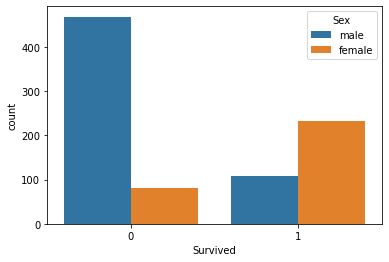

In [377]:
sns.countplot(x='Survived', hue='Sex', data=data_train)

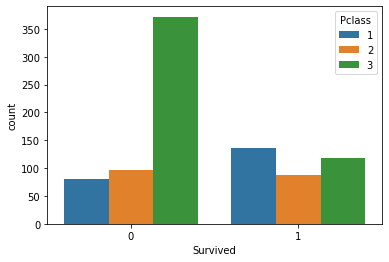

In [378]:
sns.countplot(x='Survived', hue='Pclass', data=data_train)

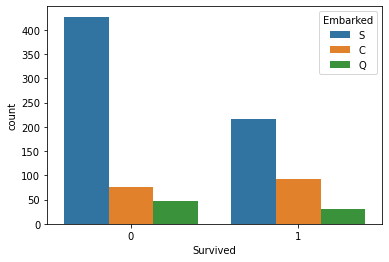

In [379]:
sns.countplot(x='Survived', hue='Embarked', data=data_train)

In [380]:
data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])

<ipython-input-380-2778ef09c60b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('Survived')['Age', 'Fare'].agg([np.mean, np.std])


Age                  Fare           
               mean        std       mean        std
Survived                                            
0         30.626179  14.172110  22.117887  31.388207
1         28.343690  14.950952  48.395408  66.596998

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


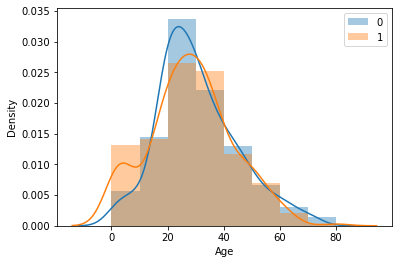

In [381]:
bins=[0,10,20,30,40,50,60,70,80]

for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Age'], kde=True, label=outcome, bins=bins)
    
plt.legend()

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


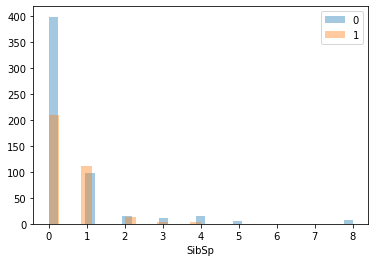

In [382]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['SibSp'], kde=False, label=outcome,)
    
plt.legend()

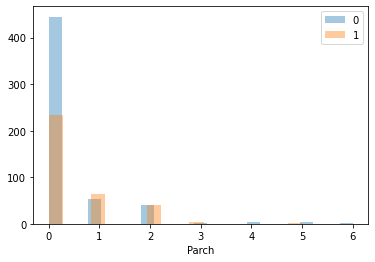

In [383]:
for outcome in data_train['Survived'].unique():
    mask = data_train['Survived'] == outcome
    sns.distplot(data_train[mask]['Parch'], kde=False, label=outcome,)
    
plt.legend()

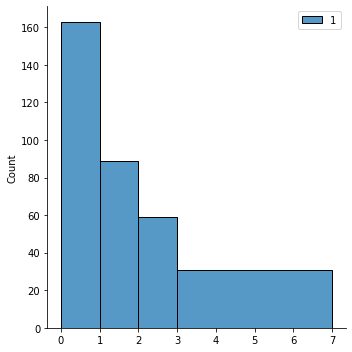

In [384]:
mask = data_train['Survived'] == 1
sns.displot((data_train[mask]['Parch']+data_train[mask]['SibSp']), kde=False, label=1, bins=[0,1,2,3,7])
plt.legend()

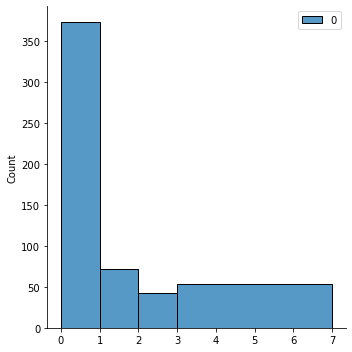

In [385]:
mask = data_train['Survived'] == 0
sns.displot((data_train[mask]['Parch']+data_train[mask]['SibSp']), kde=False, label=0, bins=[0,1,2,3,7])
plt.legend()

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


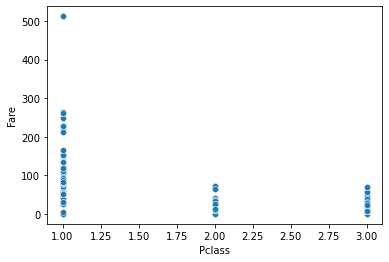

In [386]:
sns.scatterplot('Pclass', 'Fare', data=data_train)

# Train Model(s)

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [388]:
# Function for giving all evaluation stats back
def classfier_eval(y_true, y_pred):
    
    print(f' Accuracy (TP+TN/TP+TN+FN+FP): {round(accuracy_score(y_true, y_pred),2)}') 
    print(f' Precision (TP/TP+FP): {round(precision_score(y_true, y_pred),2)}')
    print(f' Recall (TP/TP+FN): {round(recall_score(y_true, y_pred),2)}')    
    print(f' F1-score (Precision*Recall/Precision+Recall): {round(f1_score(y_true, y_pred),2)}')   

In [389]:
def train_model(X_train, y_train, model):
    # Create model
    m = model
    # Fitting the model
    m.fit(X_train, y_train)
    # Fitting parameters
    #print(f'w0 = {round(m.intercept_[0], 2)}')
    #for i in range(len(m.coef_[0])):
    #    print(f'w{i+1} = {round(m.coef_[0][i], 2)}')
    #print()
    
    # Gives states of training model performance back
    print(classfier_eval(y_train, m.predict(X_train)))
    
    # Confusion matrix of the model PClass vs Survival
    plot_confusion_matrix(estimator=m,
                     X=X_train,
                     y_true=y_train)
    
    
    # returns model
    return m

## Step 5 - Benchmark Model

### Logistic regression on pClass only

In [390]:
# Define X and y of Model 
X = data_train[['Pclass']]
y = data_train['Survived']

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49
None


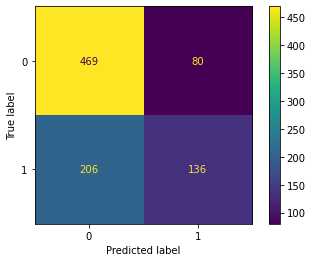

In [391]:
m_benchmark = train_model(X, y, LogisticRegression(random_state=20))

In [392]:
cross_val_accuracy = cross_val_score(estimator=m_benchmark
                   , X=X
                   , y=y
                   , cv=5
                   , scoring='accuracy')

In [393]:
cross_val_accuracy.mean()

0.6790973573535873

### Decision Tree

 Accuracy (TP+TN/TP+TN+FN+FP): 0.68
 Precision (TP/TP+FP): 0.63
 Recall (TP/TP+FN): 0.4
 F1-score (Precision*Recall/Precision+Recall): 0.49
None


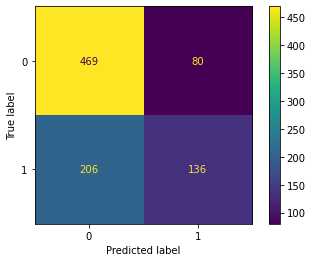

In [398]:
m_tree_bench = train_model(X, y, DecisionTreeClassifier(max_depth=2, random_state=20))

 Accuracy (TP+TN/TP+TN+FN+FP): 0.79
 Precision (TP/TP+FP): 0.79
 Recall (TP/TP+FN): 0.61
 F1-score (Precision*Recall/Precision+Recall): 0.69
None


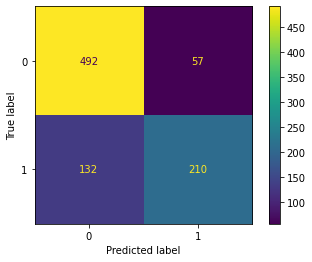

In [397]:
m_forest_bench = train_model(data_train.drop(['PassengerId', 'Cabin', 'Name', 'Sex', 'Embarked', 'Ticket', 'Age', 'Survived'], axis=1), y, RandomForestClassifier(random_state=20, max_depth=7, n_estimators=500))

## Step 6 - Feature Engineering

In [399]:
from sklearn.compose import ColumnTransformer # Column Transformer
from sklearn.impute import SimpleImputer # Imputation
from sklearn.preprocessing import OneHotEncoder # One-Hot Encoding
from sklearn.preprocessing import KBinsDiscretizer # Binning
from sklearn.pipeline import Pipeline #  Pipeline for chaining Column Transformers
from sklearn.preprocessing import MinMaxScaler # Scaler between 0 and 1 - distribution stays the same
from sklearn.preprocessing import StandardScaler # Scaler with normal distribution - mean 0 and 1 standard deviation
from sklearn.preprocessing import PowerTransformer # make the data more Gaussian-like
from sklearn.preprocessing import FunctionTransformer # for custom-build functions
import feature_names

In [400]:
# Define X and y of Model 
X_train = data_train.drop('Survived', axis=1)
y_train = data_train['Survived']

In [401]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Age

#### Replace NaN

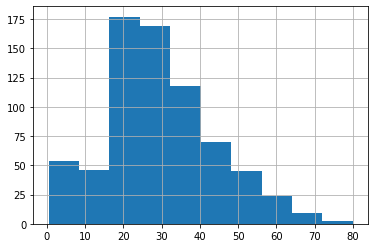

In [402]:
X_train['Age'].hist(bins=10)

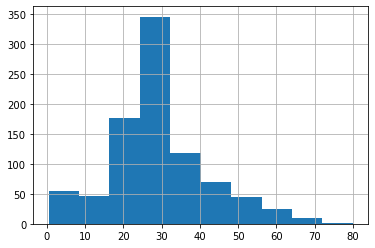

In [403]:
X_train['Age'].fillna(value=data_train['Age'].median()).hist(bins=10)

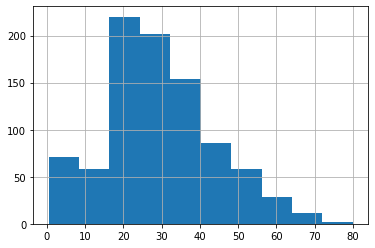

In [404]:
X_train['Age'].fillna(method='ffill').hist(bins=10) ## Forward fill seems not alter much the distribution

In [405]:
X_train['Age_ffill'] = data_train['Age'].fillna(method='ffill') ## Fill NaN with previous values

In [217]:
age_feat = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [406]:
age_feat.bin_edges_

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaa38845b0>]],
      dtype=object)

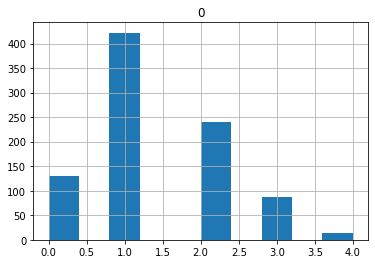

In [407]:
pd.DataFrame(age_feat.fit_transform(X_train[['Age_ffill']])).hist()

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


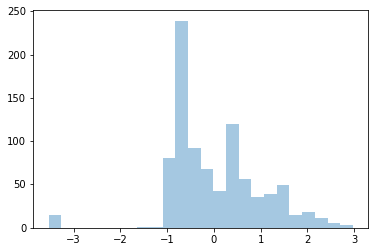

In [221]:
fare_Scaler = PowerTransformer() #StandardScaler()  
scaled_fare = fare_Scaler.fit_transform(X_train[['Fare']])
sns.distplot(scaled_fare, kde=False)

### Combine Parch and SibSp and divide them in 'Small Family' and 'Big Family'

In [408]:
def familysize(series):
    #if series < 1:
    #    return 'Single'
    if series <4:
        return 'Small Family'
    else:
        return 'Big Family'

In [409]:
X_train['Parch_SibSp'] = X_train['Parch'] + X_train['SibSp']  
X_train['Family_Size'] = X_train['Parch_SibSp'].apply(familysize)

### Create Pipeline and Transformers

In [462]:
pipeline_emb = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('oneHot', OneHotEncoder(sparse=True))])
pipeline_fare = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scale', PowerTransformer())])

In [463]:
feature_eng = ColumnTransformer([
    ('pass', 'passthrough', ['Pclass', 'Age_ffill']),
    ('encode_Sex', OneHotEncoder(sparse=True, drop='if_binary'), ['Sex']),
    ('encode_Family_size', OneHotEncoder(sparse=True), ['Family_Size']), # Keep Parch and SibSp as it is
    #('impute and oneHot', pipeline_emb, ['Embarked']), 
    #('bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['Age_ffill']),
    ('impute and scale', pipeline_fare, ['Fare'])
]) 

In [464]:
feature_eng_matrix = feature_eng.fit_transform(X_train)

### Get column names of newly created features

In [465]:
# function borrowed from https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
cols = feature_names.get_feature_names(feature_eng)
print(cols)

['Pclass', 'Age_ffill', 'encode_Sex__x0_male', 'encode_Family_size__x0_Big Family', 'encode_Family_size__x0_Small Family', 'impute and scale__Fare']


/Users/marf/spiced_projects/a-star-anise-student-code/week02/feature_names.py:33: UserWarning: Transformer impute (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/Users/marf/spiced_projects/a-star-anise-student-code/week02/feature_names.py:33: UserWarning: Transformer scale (type PowerTransformer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


### Create feature engineered Dataframe for Model

In [466]:
X_train_feat = pd.DataFrame(feature_eng_matrix, columns=cols)

In [467]:
X_train_feat.head()

,Pclass,Age_ffill,encode_Sex__x0_male,encode_Family_size__x0_Big Family,encode_Family_size__x0_Small Family,impute and scale__Fare
0,3.0,22.0,1.0,0.0,1.0,-0.878820
1,1.0,38.0,0.0,0.0,1.0,1.336651
2,3.0,26.0,0.0,0.0,1.0,-0.790065
3,1.0,35.0,0.0,0.0,1.0,1.067352
4,3.0,35.0,1.0,0.0,1.0,-0.774439


## Step 7 - Train and Evaluate the Model - Random Forest

 Accuracy (TP+TN/TP+TN+FN+FP): 0.89
 Precision (TP/TP+FP): 0.92
 Recall (TP/TP+FN): 0.8
 F1-score (Precision*Recall/Precision+Recall): 0.85
None


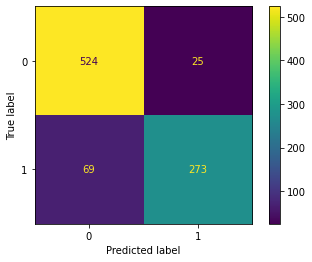

In [485]:
m_feature = train_model(X_train_feat, y_train, RandomForestClassifier(max_depth=7, n_estimators=500, random_state=20)) #RandomForestClassifier()LogisticRegression(random_state=20)

### Get feature Importance

In [469]:
m_feature.feature_importances_

array([0.12420585, 0.18588786, 0.41414455, 0.02583121, 0.02931858,
       0.22061196])

## Step 8 - Cross-Validation

In [470]:
cross_val_feature_acc = cross_val_score(estimator=m_feature
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='accuracy')

In [471]:
cross_val_feature_pre = cross_val_score(estimator=m_feature
                   , X=X_train_feat
                   , y=y_train
                   , cv=5
                   , scoring='recall')

In [472]:
print(f'Cross-Validation(Accuracy): {round(cross_val_feature_acc.mean(),2)}')
print(f'Cross-Validation(Precision): {round(cross_val_feature_pre.mean(),2)}')

Cross-Validation(Accuracy): 0.82
Cross-Validation(Precision): 0.68


## Step 9 - Test on test data - on Kaggle test data

In [473]:
X_test = pd.read_csv('data/test.csv')

In [474]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [475]:
X_test['Age_ffill'] = X_test['Age'].fillna(method='ffill')

In [478]:
X_test['Parch_SibSp'] = X_test['Parch'] + X_test['SibSp'] 
X_test['Family_Size'] = X_test['Parch_SibSp'].apply(familysize)

In [480]:
X_test_feat = pd.DataFrame(feature_eng.transform(X_test))

In [481]:
outcome = pd.DataFrame({'PassengerId' : X_test['PassengerId'], 'Survived' : m_feature.predict(X_test_feat)})
outcome.set_index('PassengerId', inplace=True)

In [482]:
outcome.to_csv('data/outcome.csv')